In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines (1).csv


In [45]:
data=pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [46]:
data['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
162.17      1
144.30      1
107.05      1
169.61      1
143.26      1
Name: TEY, Length: 4207, dtype: int64

In [47]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [48]:
for i in data.columns:
  print(data[i].value_counts(),'\n')

19.6760    5
11.5850    5
14.0430    5
25.9690    5
12.0680    5
          ..
24.3220    1
5.8949     1
6.3592     1
7.7117     1
10.2500    1
Name: AT, Length: 12086, dtype: int64 

1011.80    129
1012.10    127
1011.90    121
1010.80    119
1013.60    118
          ... 
997.78       1
986.25       1
996.89       1
996.29       1
1031.00      1
Name: AP, Length: 540, dtype: int64 

100.140    31
100.150    29
100.110    28
100.120    24
100.130    19
           ..
95.180      1
76.509      1
90.342      1
69.158      1
84.000      1
Name: AH, Length: 12637, dtype: int64 

4.5032    7
4.4361    6
4.2500    6
3.8837    6
4.4273    6
         ..
4.0567    1
3.2617    1
3.9554    1
4.5783    1
3.5000    1
Name: AFDP, Length: 11314, dtype: int64 

25.552    9
24.288    9
25.487    9
24.361    9
24.308    9
         ..
23.683    1
37.340    1
26.484    1
29.854    1
18.500    1
Name: GTEP, Length: 8234, dtype: int64 

1100.0    761
1099.9    598
1100.1    592
1100.2    415
1099.8    368
   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


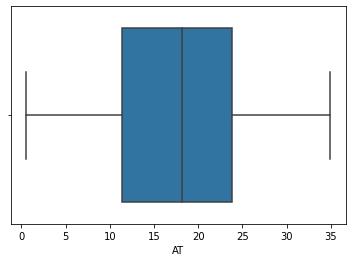

In [49]:
sns.boxplot(data['AT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


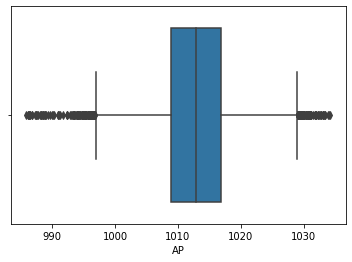

In [50]:
sns.boxplot(data['AP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


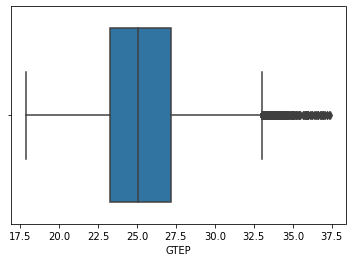

In [51]:
sns.boxplot(data['GTEP'])
data['GTEP']=data['GTEP'].loc[data.GTEP<33]

In [52]:
data=data.dropna(axis=0)
data.shape

(14363, 11)

In [53]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000
mean,18.233948,1012.940101,79.013649,4.141225,25.026410,1083.037882,546.333572,132.741320,12.001836,2.032608,68.324963
std,7.391791,6.261948,13.913889,0.712482,3.844529,16.526682,6.696303,14.676335,1.023524,2.253038,10.654177
min,0.522300,985.850000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,12.244500,1008.800000,69.419500,3.694300,22.972000,1076.400000,545.800000,125.385000,11.471000,0.913185,61.167000
50%,18.679000,1012.600000,82.229000,4.159600,24.889000,1088.000000,549.910000,133.760000,11.996000,1.434100,66.707000
75%,24.116500,1016.600000,90.057500,4.492650,26.369000,1094.100000,550.060000,135.320000,12.315000,2.235500,74.290500
max,34.929000,1034.200000,100.200000,7.610600,32.997000,1100.600000,550.610000,167.840000,14.315000,44.103000,119.890000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


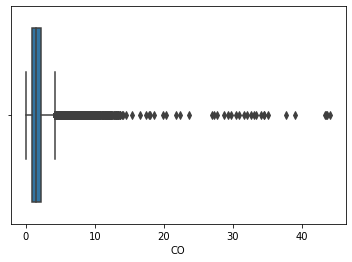

In [54]:
sns.boxplot(data['CO'])

In [55]:
#feature selection using Decision Tree:
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor()
x=data.drop('TEY',axis=1)
y=data['TEY']

In [56]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [57]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 14363, dtype: float64

In [63]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.53886171, -0.80490545,  1.27828895, ..., -1.36477946,
         0.49805249,  1.3513515 ],
       [-1.54892728, -0.72505531,  1.30121648, ..., -1.37161882,
         0.53427152,  1.35642011],
       [-1.53368011, -0.66117521,  1.21647806, ..., -1.36868767,
         0.51869201,  1.32751025],
       ...,
       [-1.48402871, -1.06042587,  1.4721308 , ..., -1.48397961,
         2.63235651,  2.12009082],
       [-1.51902821, -0.98057574,  1.43705671, ..., -1.43512709,
         1.8716681 ,  2.33738405],
       [-1.52959435, -0.91669563,  1.33104384, ..., -1.38627457,
         1.30894154,  2.2689578 ]])

In [66]:
from sklearn.model_selection import train_test_split
x_train  , x_test, y_train  , y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adadelta,Adam
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [68]:
y_pred=dt_model.predict(x_test)

In [69]:
kfold=KFold(n_splits=10)
def create_model():
    model=Sequential([Dense(12,kernel_initializer='normal',activation='relu'),Dense(8,kernel_initializer='normal',activation='relu'),Dense(1,kernel_initializer='normal')])
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_error',optimizer=adam)
    return model

In [77]:
model= create_model()
model_one= model.fit(x_train,y_train,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
360/360 [==============================] - 1s 1ms/step - loss: 7239.3032
Epoch 2/100
360/360 [==============================] - 0s 1ms/step - loss: 61.0320
Epoch 3/100
360/360 [==============================] - 0s 1ms/step - loss: 19.3048
Epoch 4/100
360/360 [==============================] - 0s 1ms/step - loss: 7.8993
Epoch 5/100
360/360 [==============================] - 0s 1ms/step - loss: 2.7668
Epoch 6/100
360/360 [==============================] - 0s 1ms/step - loss: 1.4068
Epoch 7/100
360/360 [==============================] - 0s 1ms/step - loss: 0.8442
Epoch 8/100
360/360 [==============================] - 0s 1ms/step - loss: 0.7403
Epoch 9/100
360/360 [==============================] - 1s 1ms/step - loss: 0.6940
Epoch 10/100
360/360 [==============================] - 0s 1ms/step - loss: 1.2513
Epoch 11/100
360/360 [==============================] - 0s 1ms/step - loss: 1.0834
Epoch 12/100
360/360 [==============================] - 0s 1ms/step - loss: 0.8736
Epoch 13

In [78]:
y_pred=model.predict(x_test)

In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.9969104195193855


Text(0, 0.5, 'actual value')

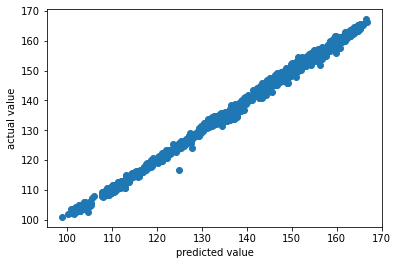

In [80]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)
plt.xlabel("predicted value")
plt.ylabel("actual value")

In [81]:
from sklearn.model_selection import train_test_split
x_train  , x_test, y_train  , y_test  = train_test_split(x,y,test_size=0.25,random_state=7 )

In [85]:
model_1 = create_model()
model_one_1 = model_1.fit(x_train,y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
337/337 [==============================] - 1s 1ms/step - loss: 7699.5501
Epoch 2/200
337/337 [==============================] - 0s 1ms/step - loss: 69.3582
Epoch 3/200
337/337 [==============================] - 0s 1ms/step - loss: 15.9834
Epoch 4/200
337/337 [==============================] - 0s 1ms/step - loss: 4.6465
Epoch 5/200
337/337 [==============================] - 0s 1ms/step - loss: 2.1511
Epoch 6/200
337/337 [==============================] - 0s 1ms/step - loss: 1.3189
Epoch 7/200
337/337 [==============================] - 0s 1ms/step - loss: 1.0521
Epoch 8/200
337/337 [==============================] - 0s 1ms/step - loss: 0.6267
Epoch 9/200
337/337 [==============================] - 0s 1ms/step - loss: 0.6748
Epoch 10/200
337/337 [==============================] - 0s 1ms/step - loss: 0.7284
Epoch 11/200
337/337 [==============================] - 0s 1ms/step - loss: 0.6776
Epoch 12/200
337/337 [==============================] - 0s 1ms/step - loss: 0.8164
Epoch 13

In [86]:
# training accuracy of base model :
y_train_pred = model_1.predict(x_train)
print("training accuracy :", r2_score(y_train_pred, y_train))

training accuracy : 0.9951509097247128


In [87]:
# testing accuracy of base model :
y_test_pred = model_1.predict(x_test)
print("training accuracy :", r2_score(y_test_pred, y_test))

training accuracy : 0.9949993206036767
